### Zomato Indore Restaurants

In [1]:
import numpy as np
import pandas as pd
from selenium import webdriver
import requests
from bs4 import BeautifulSoup
import time

In [2]:
browser = webdriver.Chrome()

In [3]:
url = 'https://www.zomato.com/indore/dine-out'
browser.get(url)

In [4]:
for i in range(0, 20):
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight*0.8);")
    time.sleep(5)
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight*0.86);")
    time.sleep(1)

In [5]:
html = browser.page_source

In [6]:
soup = BeautifulSoup(html, 'html.parser')

In [7]:
def zomato(soup):
    name = [i.text.strip() for i in soup.find_all('h4', class_='sc-1hp8d8a-0 sc-ldcLGC cAJOya')]
    cuisine = [i.text.strip() for i in soup.find_all('p', class_='sc-1hez2tp-0 sc-hXhGGG iPEMLc')]
    area = [i.text.strip() for i in soup.find_all('p', class_='sc-1hez2tp-0 sc-hTQSVH gJqRzf')]
    rate = [i.text.strip() for i in soup.find_all('p', class_='sc-1hez2tp-0 sc-hXhGGG edfwAy')]
    
    return pd.DataFrame({'Name':name,
                         'Cuisine':cuisine, 
                         'Area':area,
                         'Rate for Two':rate                       
                        })

In [8]:
df = zomato(soup)
df

,Name,Cuisine,Area,Rate for Two
0,House Of Malts,"North Indian, Chinese, Continental","Vijay Nagar, Indore","₹1,000 for two"
1,Chill Baby,"Chinese, North Indian, Pizza, Fast Food, Pasta...","Vijay Nagar, Indore",₹450 for two
2,Revolution Indore,"North Indian, Continental, Fast Food","Vijay Nagar, Indore","₹2,000 for two"
3,JAL - A Jungle Restaurant,"North Indian, Chinese, Mughlai, Beverages","Bhawar Kuan, Indore",₹850 for two
4,Bollywood Theka,"Finger Food, North Indian, Fast Food, Chinese","Infiniti Hotel, Vijay Nagar, Indore",₹900 for two
...,...,...,...,...
487,Bawarchi Chur Chur Naan,North Indian,"Khajrana, Indore",₹500 for two
488,The Sawariya Cafe,"Chinese, Fast Food","Rajendra Nagar, Indore",₹350 for two
489,Apna Sandwich,"Sandwich, Fast Food","Chhavani, Indore",₹150 for two
490,The Sajan Celebration,"Sandwich, Fast Food, Beverages, Bakery","HIG-LIG, Indore",₹350 for two


In [31]:
df['Rate for Two'] = df['Rate for Two'].apply(lambda x: x.split()[0].replace('₹', '').replace(',', ''))

In [37]:
df['Rate for Two'] = df['Rate for Two'].astype('int64')

In [38]:
df

,Name,Cuisine,Area,Rate for Two
0,House Of Malts,"North Indian, Chinese, Continental","Vijay Nagar, Indore",1000
1,Chill Baby,"Chinese, North Indian, Pizza, Fast Food, Pasta...","Vijay Nagar, Indore",450
2,Revolution Indore,"North Indian, Continental, Fast Food","Vijay Nagar, Indore",2000
3,JAL - A Jungle Restaurant,"North Indian, Chinese, Mughlai, Beverages","Bhawar Kuan, Indore",850
4,Bollywood Theka,"Finger Food, North Indian, Fast Food, Chinese","Infiniti Hotel, Vijay Nagar, Indore",900
...,...,...,...,...
487,Bawarchi Chur Chur Naan,North Indian,"Khajrana, Indore",500
488,The Sawariya Cafe,"Chinese, Fast Food","Rajendra Nagar, Indore",350
489,Apna Sandwich,"Sandwich, Fast Food","Chhavani, Indore",150
490,The Sajan Celebration,"Sandwich, Fast Food, Beverages, Bakery","HIG-LIG, Indore",350


### Analysis of 'Cuisine' Column

#### Word Cloud 

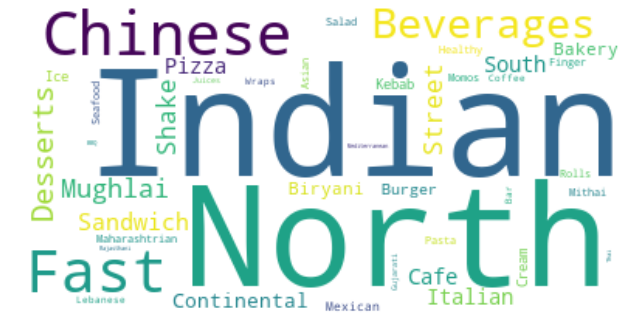

In [51]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = ' '.join(list(df['Cuisine']))
STOPWORDS = list(STOPWORDS) + ['Food']
wordcloud = WordCloud(collocations = False, background_color = 'white', stopwords=STOPWORDS).generate(text)

plt.figure(figsize = (10,10), dpi = 80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

* Most of the Restaurants in Indore serves North Indian, Chinese, Fast Food cuisines.

### Analysis of 'Rate for Two' Column

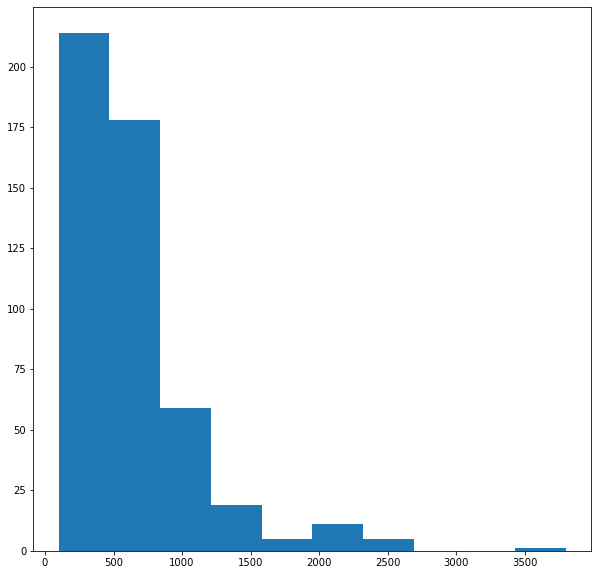

In [44]:
plt.figure(figsize = (10,10))
plt.hist(data = df, x = 'Rate for Two');

* Most of resaturants are ranging between Rs. 100 to Rs. 800 for two persons, thus making them budget friendly.
* With similar analysis, we can make a judgement on the Price trends of restarurants for each city of India.